# Dimensionality reduction using Keras Auto Encoder

* Prepare Data
* Design Auto Encoder
* Train Auto Encoder
* Use Encoder level from Auto Encoder
* Use Encoder to obtain reduced dimensionality data for train and test sets

In [5]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow'

## Read train and test data

In [17]:
train = pd.read_csv('./train_encoded.csv')
test = pd.read_csv('./test_encoded.csv')

In [8]:
train.head(); train.shape
test.head(); test.shape

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,target
0,0.0,0.0,0.032652,0.0,0.002830,0.057983,0.0,0.0,0.175312,0.0,...,0.171585,0.055782,0.0,0.0,0.0,0.028607,0.0,0.053165,0.0,38000000.0
1,0.0,0.0,0.030979,0.0,0.000424,0.055939,0.0,0.0,0.170989,0.0,...,0.163495,0.051961,0.0,0.0,0.0,0.028286,0.0,0.051000,0.0,600000.0
2,0.0,0.0,0.056453,0.0,0.015519,0.088761,0.0,0.0,0.234394,0.0,...,0.242120,0.084113,0.0,0.0,0.0,0.025221,0.0,0.072811,0.0,10000000.0
3,0.0,0.0,0.056309,0.0,0.015798,0.088499,0.0,0.0,0.234303,0.0,...,0.242475,0.084081,0.0,0.0,0.0,0.025503,0.0,0.072797,0.0,2000000.0
4,0.0,0.0,0.044566,0.0,0.008390,0.073897,0.0,0.0,0.205272,0.0,...,0.207337,0.069359,0.0,0.0,0.0,0.026556,0.0,0.063297,0.0,14400000.0


(4459, 201)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
0,0.0,0.0,0.024538,0.0,0.000000,0.045839,0.0,0.0,0.149685,0.0,...,0.0,0.141402,0.042400,0.0,0.0,0.0,0.028296,0.0,0.044551,0.0
1,0.0,0.0,0.058296,0.0,0.017126,0.091006,0.0,0.0,0.239490,0.0,...,0.0,0.248532,0.086392,0.0,0.0,0.0,0.025259,0.0,0.074349,0.0
2,0.0,0.0,0.051791,0.0,0.012360,0.083106,0.0,0.0,0.221741,0.0,...,0.0,0.227867,0.078469,0.0,0.0,0.0,0.025879,0.0,0.069934,0.0
3,0.0,0.0,0.038092,0.0,0.004549,0.065755,0.0,0.0,0.189635,0.0,...,0.0,0.187429,0.061617,0.0,0.0,0.0,0.028196,0.0,0.057663,0.0
4,0.0,0.0,0.040451,0.0,0.006021,0.069720,0.0,0.0,0.194577,0.0,...,0.0,0.194506,0.064851,0.0,0.0,0.0,0.027344,0.0,0.060139,0.0


(49342, 200)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(test)
X_scaled = scaler.transform(test) # 평균조정된 X
print(f'평균: {X_scaled.mean().round(2)}, 표준펀차: {X_scaled.std()}')

평균: 0.0, 표준펀차: 0.7937253933193771


Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

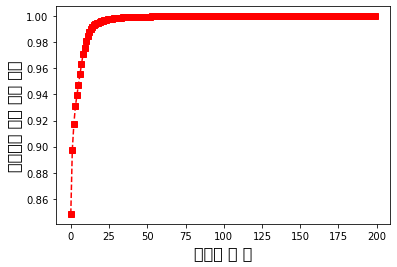

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

## Dropping Target and ID's from train and test

In [11]:
'ID' in train.columns

False

In [12]:
target = train['target']
train_id = train['ID']
test_id = test['ID']

train.drop(['target'], axis=1, inplace=True)
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

KeyError: 'ID'

In [ ]:
print('Train data shape', train.shape)
print('Test data shape', test.shape)

### Scaling Train and Test data for Neural Net

In [ ]:
train_scaled = minmax_scale(train, axis = 0)
test_scaled = minmax_scale(test, axis = 0)


## Design Auto Encoder

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder. 

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.

To achieve this, the Neural net is trained using the Training data as the training features as well as target.

```
# Training a Typical Neural Net
model.fit(X_train, y_train)

# Training a Auto Encoder
model.fit(X_train, X_train)
```

These are typically used for dimensionality reduction use cases where there are more number of features.

![](https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png)

By Chervinskii [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons

In [ ]:
# define the number of features
ncol = train_scaled.shape[1]

### Split train data into train and validation 80:20 in ratio

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, target, train_size = 0.9, random_state = seed(2017))

In [ ]:
### Define the encoder dimension
encoding_dim = 200

In [ ]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(3000, activation = 'relu')(input_dim)
encoded2 = Dense(2750, activation = 'relu')(encoded1)
encoded3 = Dense(2500, activation = 'relu')(encoded2)
encoded4 = Dense(2250, activation = 'relu')(encoded3)
encoded5 = Dense(2000, activation = 'relu')(encoded4)
encoded6 = Dense(1750, activation = 'relu')(encoded5)
encoded7 = Dense(1500, activation = 'relu')(encoded6)
encoded8 = Dense(1250, activation = 'relu')(encoded7)
encoded9 = Dense(1000, activation = 'relu')(encoded8)
encoded10 = Dense(750, activation = 'relu')(encoded9)
encoded11 = Dense(500, activation = 'relu')(encoded10)
encoded12 = Dense(250, activation = 'relu')(encoded11)
encoded13 = Dense(encoding_dim, activation = 'relu')(encoded12)

# Decoder Layers
decoded1 = Dense(250, activation = 'relu')(encoded13)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1000, activation = 'relu')(decoded3)
decoded5 = Dense(1250, activation = 'relu')(decoded4)
decoded6 = Dense(1500, activation = 'relu')(decoded5)
decoded7 = Dense(1750, activation = 'relu')(decoded6)
decoded8 = Dense(2000, activation = 'relu')(decoded7)
decoded9 = Dense(2250, activation = 'relu')(decoded8)
decoded10 = Dense(2500, activation = 'relu')(decoded9)
decoded11 = Dense(2750, activation = 'relu')(decoded10)
decoded12 = Dense(3000, activation = 'relu')(decoded11)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded13)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [ ]:
autoencoder.summary()

### Train Auto Encoder

In [ ]:
autoencoder.fit(X_train, X_train, nb_epoch = 10, batch_size = 32, shuffle = False, validation_data = (X_test, X_test))

## Use Encoder level to reduce dimension of train and test data

In [ ]:
encoder = Model(inputs = input_dim, outputs = encoded13)
encoded_input = Input(shape = (encoding_dim, ))

### Predict the new train and test data using Encoder

In [ ]:
encoded_train = pd.DataFrame(encoder.predict(train_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_test = pd.DataFrame(encoder.predict(test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

### Add target to train

In [ ]:
encoded_train['target'] = target

In [ ]:
print(encoded_train.shape)
encoded_train.head()

In [ ]:
print(encoded_test.shape)
encoded_test.head()

In [ ]:
encoded_train.to_csv('train_encoded.csv', index=False)
encoded_test.to_csv('test_encoded.csv', index=False)

## I have created a kernel to Build a baseline model using LightGBM for these encoded features. You can find it here :

[https://www.kaggle.com/saivarunk/lgb-baseline-using-encoded-features-auto-encoder](https://www.kaggle.com/saivarunk/lgb-baseline-using-encoded-features-auto-encoder)